## Problem Statement

- **Predict the optimum number of clusters from the dataset given 'Iris dataset' and represent it visually.**

- **Can Use R or Python or perform this task.**

## Solution:

**What is unsupervised Machine Learning.?**

- **`Unsupervised learning is a machine learning technique in which it allows to model to work on its own to discover pattern and information that was previously undetected.`**


**`unsupervised learning problems are further grouped into clustering and association problems`**

**What is clustering?**
* `It mainly delas with finding a structure or pattern in a collection of uncategorized data.`


For this IRIS data set I am using **k-Means clustering** algorithm.

**k-menas clustering:** **`A k-Means Clustering algorithm tries to group similar items in the form of clusters.The No.of groups is represented by 'k'`**


## Example Visualisation of kmeans




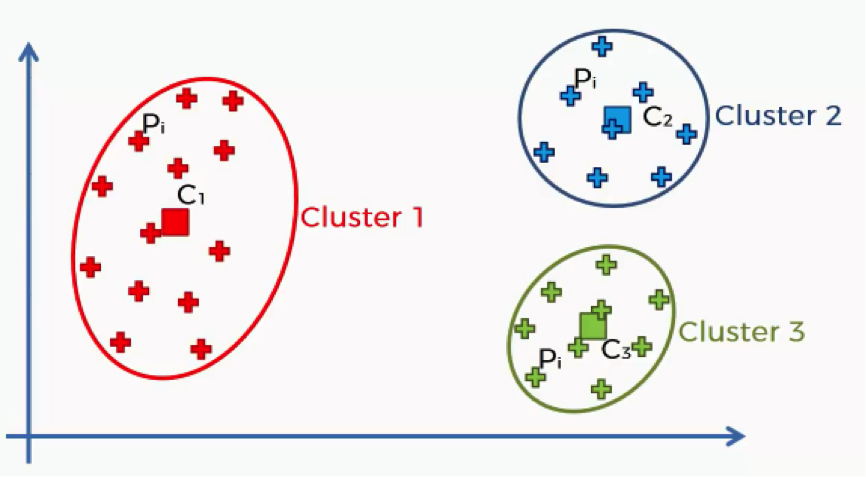

In [1]:
from IPython.display import Image
Image(filename='k-means.png')


As above Demonstration with picture also do the same with problem statement.


# Import Libraries


In [2]:
## Lets have fun with coding
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


# Loading iris data set


In [3]:
df = pd.read_csv("Iris.csv")
df.drop(['Id'], axis=1).head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Data set Info:


**`df.info():prints a concise summary and information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage. Whether to print the full summary.`**


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.columns

#It can be thought of as a dict-like container for Series objects. 
#This is the primary data structure of the Pandas. columns attribute return the column labels of the given Dataframe. 


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
df.Species.unique

<bound method Series.unique of 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object>

In [7]:
label_dict = {'Setosa':0,'Versicolor':1,'Virginica':2}

In [8]:
df = df.replace({'Species': label_dict})

In [9]:
features = df.iloc[:,[1,2,3,4]].values
label = df.iloc[:,[5]].values

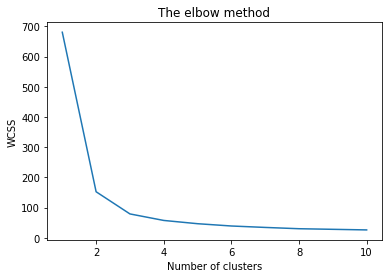

In [10]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=300,n_init = 10, random_state= 0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

- The **elbow** method to help data scientists **select the optimal number of clusters by fitting the model** with a range of values for K.

- If the line chart resembles an arm, then the “**elbow**” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point.

In [11]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(features)

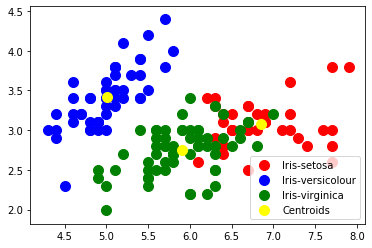

In [12]:
# Visualising the clusters - On the first two columns
plt.scatter(features[y_kmeans == 0, 0], features[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(features[y_kmeans == 1, 0], features[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(features[y_kmeans == 2, 0], features[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()